# Import library

In [35]:
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Import dataset

In [36]:
df = pd.read_csv('/content/menghapus_anomaly.csv')
df.head()

,Id,Tanggal Kejadian,Waktu Kejadian,Alamat Kejadian,Latitude,Longitude,Jenis Kendaraan R,jam,Tanggal,Bulan,Tahun,hari
0,1,13/01/2023,1350,"JL. PH. H. MUSTOPA NO.31, KOTA BANDUNG KEL PAD...",-6.899781,107.644289,0,22,13,1,2023,Jumat
1,2,21/01/2023,390,"JL. SIDOMUKTI NO 11, KEL. SUKALUYU, KEC. CIBEU...",-6.895089,107.628508,0,6,21,1,2023,Sabtu
2,3,21/01/2023,390,"JL. SIDOMUKTI NO 11, KEL. SUKALUYU, KEC. CIBEU...",-6.895089,107.628508,0,6,21,1,2023,Sabtu
3,4,21/01/2023,1230,"JL. CIGADUNG RAYA TENGAH NO.28, KEL. CIGADUNG ...",-6.883221,107.630975,0,20,21,1,2023,Sabtu
4,5,25/01/2023,1380,"JL. CIGADUNG RAYA TIMUR, KEL. CIGADUNG KEC. CI...",-6.884179,107.632519,1,23,25,1,2023,Rabu


# Menghapus duplikat

In [37]:
# Menghapus baris duplikat berdasarkan semua kolom
df = df.drop_duplicates()

# Tampilkan jumlah baris dan kolom setelah menghapus duplikasi
print(f"Jumlah baris dan kolom setelah menghapus duplikasi: {df.shape}")

Jumlah baris dan kolom setelah menghapus duplikasi: (565, 12)


# Pemilihan kolom

In [38]:
# Pemilihan kolom waktu kejadian
df = df[['Waktu Kejadian']]

# Tampilkan 5 baris pertama dari dataset setelah menghapus kolom yang tidak relevan
df.head()

,Waktu Kejadian
0,1350
1,390
2,390
3,1230
4,1380


# Standardisasi kolom waktu kejadian

In [39]:
# Standarisasi kolom 'waktu_kejadian'
scaler = StandardScaler()
df['waktu_kejadian_scaled'] = scaler.fit_transform(df[['Waktu Kejadian']])

# Tampilkan 5 baris pertama dari dataset untuk memastikan standarisasi berhasi
df.head()

,Waktu Kejadian,waktu_kejadian_scaled
0,1350,1.545298
1,390,-0.589878
2,390,-0.589878
3,1230,1.278401
4,1380,1.612022


# Menghapus duplikat berdasarkan kolom yang dipilih

In [40]:
# Menghapus baris duplikat berdasarkan semua kolom
df = df.drop_duplicates()

# Tampilkan jumlah baris dan kolom setelah menghapus duplikasi
print(f"Jumlah baris dan kolom setelah menghapus duplikasi: {df.shape}")

Jumlah baris dan kolom setelah menghapus duplikasi: (134, 2)


# Penentuan cluster optimal

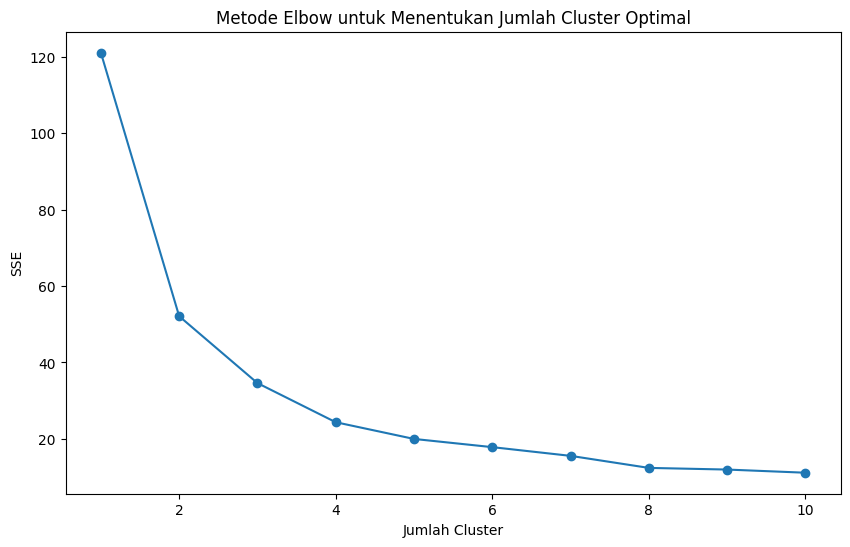

In [41]:
sse = []
silhouette_scores = []
k_range = range(1, 11)

for k in k_range:
    kmedoids = KMedoids(n_clusters=k, metric='manhattan', random_state=0)
    kmedoids.fit(df[['waktu_kejadian_scaled']])
    sse.append(kmedoids.inertia_)

    # Plot SSE untuk metode elbow
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal')
plt.xlabel('Jumlah Cluster')
plt.ylabel('SSE')
plt.show()

In [42]:
df.count()

,0
Waktu Kejadian,134
waktu_kejadian_scaled,134


In [43]:
n_clusters = 3  # Jumlah cluster optimal dari metode elbow
kmedoids = KMedoids(n_clusters=n_clusters, metric='manhattan', random_state=0)
df['cluster'] = kmedoids.fit_predict(df[['waktu_kejadian_scaled']])

# Tampilkan 5 baris pertama dari dataset untuk memastikan clustering berhasil
df.head()

,Waktu Kejadian,waktu_kejadian_scaled,cluster
0,1350,1.545298,1
1,390,-0.589878,0
3,1230,1.278401,1
4,1380,1.612022,1
5,540,-0.256256,0


# Visualisasi cluster berdasarkan waktu

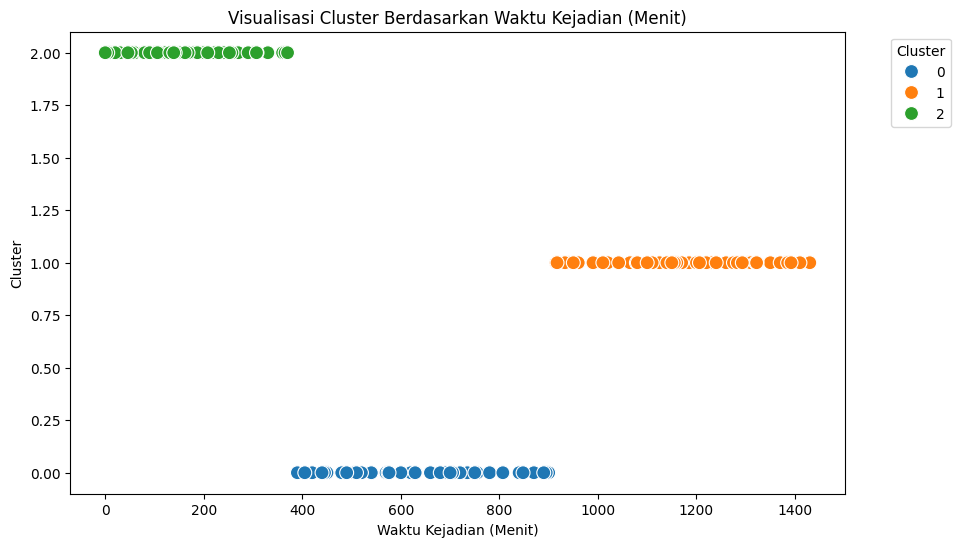

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Waktu Kejadian', y='cluster', hue='cluster', palette='tab10', s=100)
plt.title('Visualisasi Cluster Berdasarkan Waktu Kejadian (Menit)')
plt.xlabel('Waktu Kejadian (Menit)')
plt.ylabel('Cluster')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

cluster
0    36
1    50
2    48
Name: count, dtype: int64


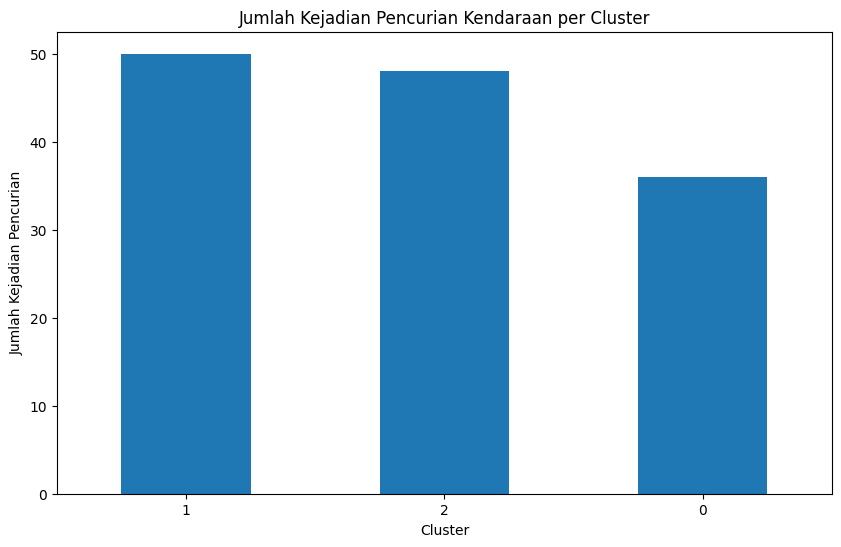

In [45]:
# Calculate the count of theft occurrences within each cluster
cluster_counts = df['cluster'].value_counts()

# Buat Diagram Batang
plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Kejadian Pencurian')
plt.title('Jumlah Kejadian Pencurian Kendaraan per Cluster')
plt.xticks(rotation=0)

# Mengetahui Jumlah Kasus per Cluster
cluster_counts = df['cluster'].value_counts().sort_index()
print(cluster_counts)

# Tampilkan plot
plt.show()

# Hasil Silhoutte Score

In [46]:
# Asumsikan df memiliki kolom 'cluster' dan fitur yang digunakan untuk clustering (misalnya, 'latitude', 'longitude')
import sklearn.metrics
X = df[['Waktu Kejadian']].values
labels = df['cluster'].values

# Hitung Silhouette Score untuk setiap titik
silhouette_values = sklearn.metrics.silhouette_samples(X, labels)

# Hitung rata-rata Silhouette Score untuk keseluruhan data
silhouette_avg = sklearn.metrics.silhouette_score(X, labels)
print(f"Average Silhouette Score: {silhouette_avg}")

# Tambahkan hasil Silhouette Score ke dataframe
df['silhouette_score'] = silhouette_values

# Tampilkan Silhouette Score rata-rata untuk setiap cluster
for cluster in np.unique(labels):
    cluster_silhouette_avg = silhouette_values[labels == cluster].mean()
    print(f"Cluster {cluster} Average Silhouette Score: {cluster_silhouette_avg}")

Average Silhouette Score: 0.6116841476036604
Cluster 0 Average Silhouette Score: 0.468773484540064
Cluster 1 Average Silhouette Score: 0.6077901689206383
Cluster 2 Average Silhouette Score: 0.7229233726961725


# Membuat kategori waktu kejadian

In [47]:
# Fungsi untuk mengkategorikan waktu
def categorize_time(minutes):
    if 0 <= minutes < 720:  # 0:00 PAGI - 11:59 SIANG
        return 'pagi hari'
    elif 720 <= minutes < 900:  # 12:00 SIANG - 14:59 SORE
        return 'siang hari'
    elif 900 <= minutes < 1080:  # 15:00 SORE - 17:59 MALAM
        return 'sore hari'
    else:  # 18:00 MALAM - 23:59 MALAM
        return 'malam hari'

# Tambahkan kolom zona waktu
df['zona_waktu'] = df['Waktu Kejadian'].apply(categorize_time)

# Lihat distribusi zona waktu untuk setiap cluster
cluster_zona_waktu = df.groupby('cluster')['zona_waktu'].value_counts().unstack().fillna(0)

# Tentukan zona waktu dominan untuk setiap cluster
cluster_zona_waktu['dominant_zona_waktu'] = cluster_zona_waktu.idxmax(axis=1)

# Lihat hasilnya
print(cluster_zona_waktu['dominant_zona_waktu'])

cluster
0     pagi hari
1    malam hari
2     pagi hari
Name: dominant_zona_waktu, dtype: object


cluster
0    36
1    50
2    48
Name: count, dtype: int64


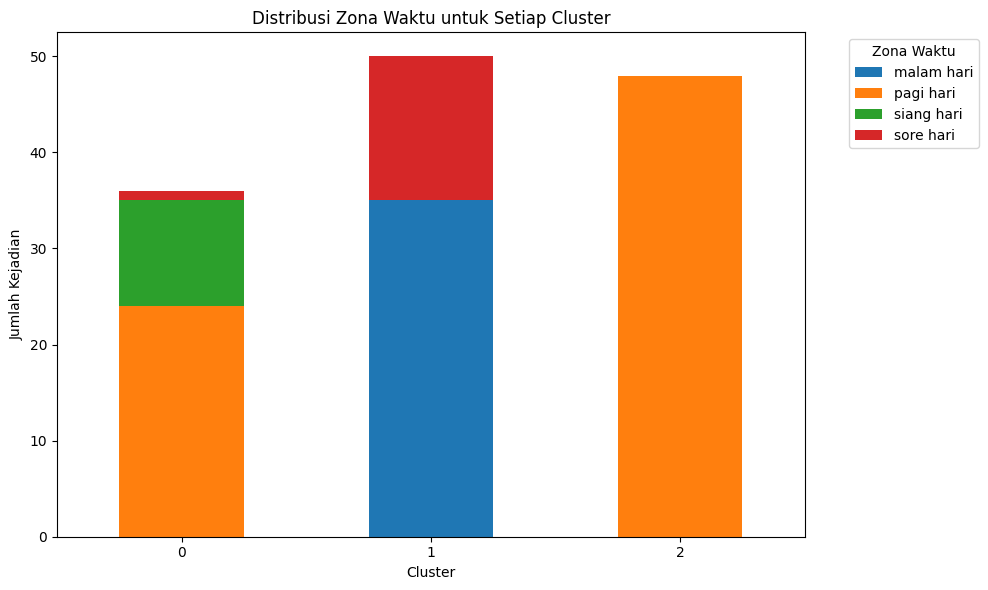

In [48]:
# Plot distribusi zona waktu untuk setiap cluster
cluster_zona_waktu.plot(kind='bar', stacked=True, figsize=(10, 6))

# Tambahkan label dan judul untuk bar
plt.xlabel('Cluster')
plt.ylabel('Jumlah Kejadian')
plt.title('Distribusi Zona Waktu untuk Setiap Cluster')
plt.legend(title='Zona Waktu', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

# Mengetahui Jumlah Kasus per Cluster
cluster_counts = df['cluster'].value_counts().sort_index()
print(cluster_counts)

# Tampilkan plot
plt.tight_layout()
plt.show()

# Data anggota pada cluster 0

In [49]:
# Filter data untuk Cluster 0
cluster_0_data = df[df['cluster'] == 0]

# Menampilkan jumlah anggota di setiap cluster
cluster_counts = df['cluster'].value_counts()

# Melihat anggota di Cluster 0
print("Anggota dalam Cluster 0:")
print(cluster_0_data)

# Menampilkan jumlah anggota di setiap cluster
print("\nJumlah anggota di setiap cluster:")
print(cluster_counts)

Anggota dalam Cluster 0:
     Waktu Kejadian  waktu_kejadian_scaled  cluster  silhouette_score  \
1               390              -0.589878        0         -0.109473   
5               540              -0.256256        0          0.596181   
6               620              -0.078325        0          0.706532   
7               570              -0.189532        0          0.651022   
10              735               0.177451        0          0.649179   
11              660               0.010640        0          0.727675   
12              755               0.221934        0          0.610087   
13              720               0.144089        0          0.673894   
20              450              -0.456429        0          0.294872   
24              505              -0.334101        0          0.510941   
26              600              -0.122808        0          0.687933   
31              420              -0.523153        0          0.116851   
35              840       

# Data anggota pada cluster 1

In [50]:
# Filter data untuk Cluster 1
cluster_1_data = df[df['cluster'] == 1]

# Menampilkan jumlah anggota di setiap cluster
cluster_counts = df['cluster'].value_counts()

# Melihat anggota di Cluster 1
print("Anggota dalam Cluster 1:")
print(cluster_1_data)

# Menampilkan jumlah anggota di setiap cluster
print("\nJumlah anggota di setiap cluster:")
print(cluster_counts)

Anggota dalam Cluster 1:
     Waktu Kejadian  waktu_kejadian_scaled  cluster  silhouette_score  \
0              1350               1.545298        1          0.732212   
3              1230               1.278401        1          0.763776   
4              1380               1.612022        1          0.712747   
9               915               0.577796        1          0.034775   
28             1020               0.811331        1          0.500874   
30             1185               1.178314        1          0.749080   
33             1260               1.345125        1          0.765987   
43             1125               1.044866        1          0.700423   
48             1140               1.078228        1          0.716739   
56              940               0.633400        1          0.188381   
57             1110               1.011504        1          0.681767   
59             1430               1.723229        1          0.671748   
66             1305       

# Data anggota pada cluster 2

In [51]:
# Filter data untuk Cluster 2
cluster_2_data = df[df['cluster'] == 2]

# Menampilkan jumlah anggota di setiap cluster
cluster_counts = df['cluster'].value_counts()

# Melihat anggota di Cluster 2
print("Anggota dalam Cluster 2:")
print(cluster_2_data)

# Menampilkan jumlah anggota di setiap cluster
print("\nJumlah anggota di setiap cluster:")
print(cluster_counts)

Anggota dalam Cluster 2:
     Waktu Kejadian  waktu_kejadian_scaled  cluster  silhouette_score  \
8               360              -0.656602        2          0.272344   
14              180              -1.056947        2          0.802340   
18               60              -1.323844        2          0.798036   
27              300              -0.790050        2          0.553301   
36              210              -0.990223        2          0.769702   
37              270              -0.856775        2          0.646020   
38              190              -1.034706        2          0.793870   
49              240              -0.923499        2          0.717460   
53              120              -1.190396        2          0.824189   
60               15              -1.423930        2          0.758277   
65              150              -1.123671        2          0.819672   
69               85              -1.268241        2          0.814795   
70              290       

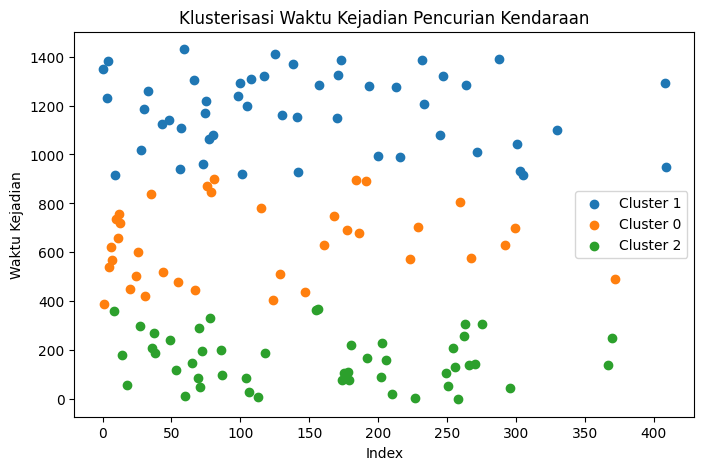

In [52]:
plt.figure(figsize=(8, 5))
for i in df['cluster'].unique():
    cluster_data = df[df['cluster'] == i]
    plt.scatter(cluster_data.index, cluster_data['Waktu Kejadian'], label=f'Cluster {i}')
plt.xlabel('Index')
plt.ylabel('Waktu Kejadian')
plt.title('Klusterisasi Waktu Kejadian Pencurian Kendaraan')
plt.legend()
plt.show()

# Frekuensi kejadian berdasarkan tahun

Jumlah baris dan kolom setelah menghapus duplikasi: (565, 12)
Jumlah kejadian per tahun:
Tahun
2021    139
2022    139
2023    284
Name: count, dtype: int64


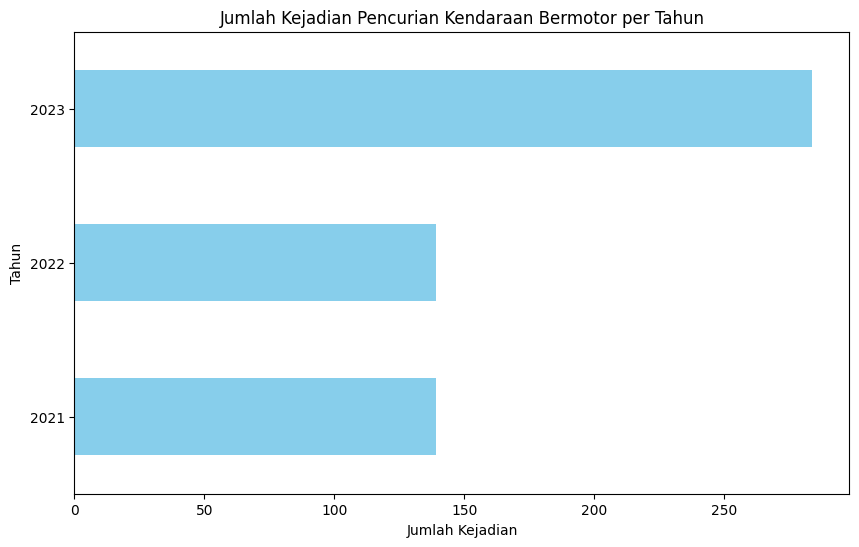

In [53]:
df = pd.read_csv('/content/menghapus_anomaly.csv')
# Menghapus baris duplikat berdasarkan semua kolom
df = df.drop_duplicates()

# Tampilkan jumlah baris dan kolom setelah menghapus duplikasi
print(f"Jumlah baris dan kolom setelah menghapus duplikasi: {df.shape}")

# Filter data hanya untuk tahun 2021, 2022, dan 2023
df_filtered = df[df['Tahun'].isin([2021, 2022, 2023])]

# Menghitung jumlah kejadian per tahun
kejadian_per_tahun = df_filtered['Tahun'].value_counts().sort_index()

# Menampilkan jumlah kejadian per tahun
print("Jumlah kejadian per tahun:")
print(kejadian_per_tahun)

# Membuat histogram horizontal
plt.figure(figsize=(10, 6))
kejadian_per_tahun.plot(kind='barh', color='skyblue')
plt.title('Jumlah Kejadian Pencurian Kendaraan Bermotor per Tahun')
plt.xlabel('Jumlah Kejadian')
plt.ylabel('Tahun')
plt.show()